### Importing required library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import ing csv 
df = pd.read_csv('E:\\ml project\\notebooks\\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Checking the datatypes of the given columns in datasets


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Hence no null values in the dataset

In [6]:
### Checking the Duplicates
df.duplicated().sum()

0

#### No duplicated in Dataset

### Checking the  no of uniques values in the datasets

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Checking the Statistics of the Datasets

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in the gender columns is:  " , end = " ")
print(df['gender'].unique())

print("Categories in the race/ethnicity	 columns is:  " , end = " ")
print(df['race/ethnicity'].unique())

print("Categories in the parental level of education columns is:  " , end = " ")
print(df['parental level of education'].unique())

print("Categories in the lunch columns is:  " , end = " ")
print(df['lunch'].unique())

print("Categories in the test preparation course columns is:  " , end = " ")
print(df['test preparation course'].unique())


Categories in the gender columns is:   ['female' 'male']
Categories in the race/ethnicity	 columns is:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the parental level of education columns is:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the lunch columns is:   ['standard' 'free/reduced']
Categories in the test preparation course columns is:   ['none' 'completed']


In [11]:
#### defining the numerical and categorical feature
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns 
print('We have {} numerical_features: {}'.format(len(numerical_feature) , numerical_feature))
print('We have {} categorical_features: {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical_features: ['math score', 'reading score', 'writing score']
We have 5 categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
## Adding the columns of the Total Sum and Average
df['Total_sum'] = df['math score'] + df['reading score'] + df['writing score']
df['average_sum'] = df['Total_sum']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_sum,average_sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


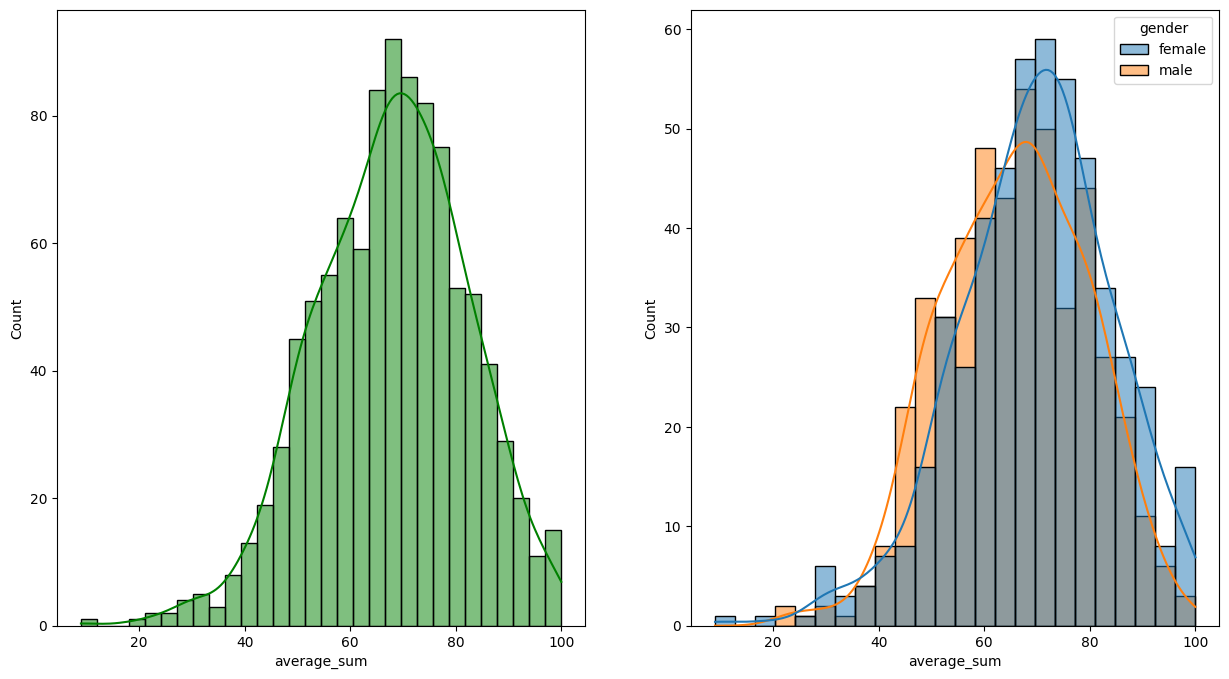

In [13]:
# Exploring the data (visualisation)
# making the histogram and Kde 
fig,axs = plt.subplots(1,2,figsize = (15,8))
plt.subplot(121)
sns.histplot(data = df , x = 'average_sum',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df , x = 'average_sum',kde = True,hue = 'gender')
plt.show()


### Insight: female student do better than male 

<Axes: xlabel='average_sum', ylabel='Count'>

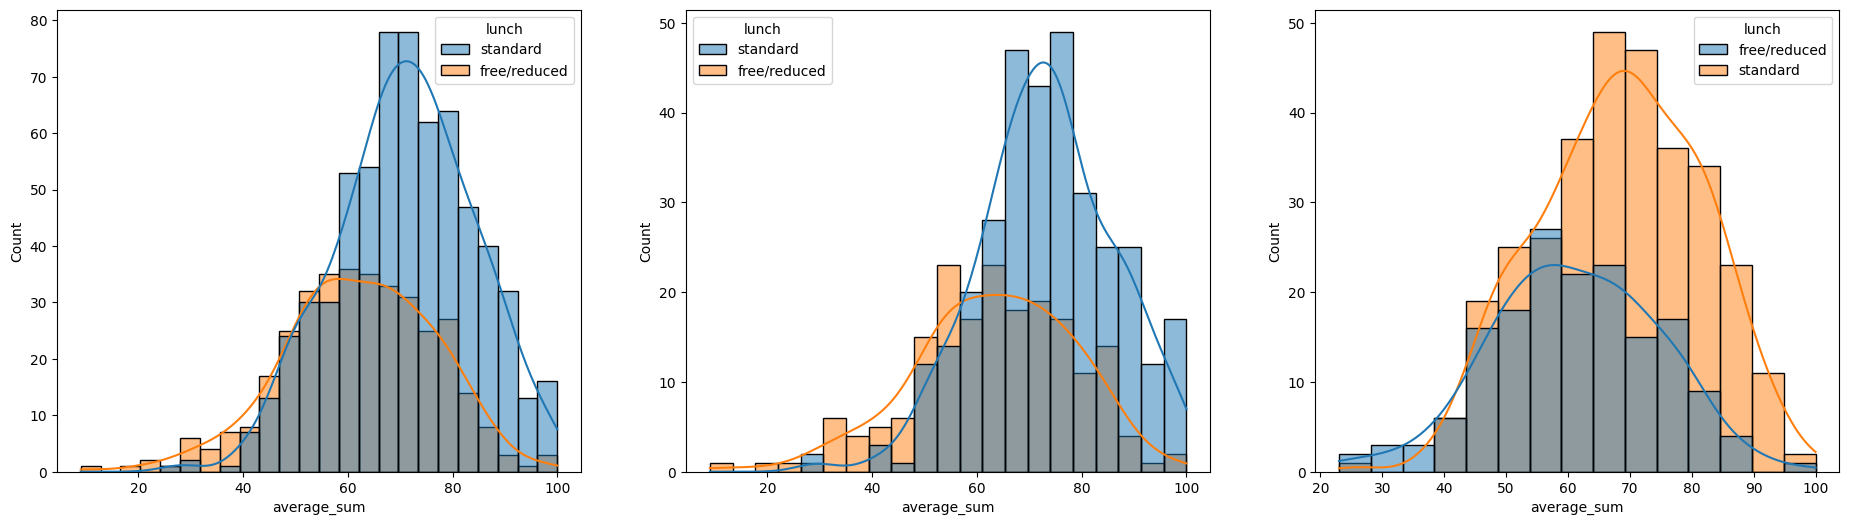

In [14]:
plt.subplots(1,3,figsize = (23,6))
plt.subplot(131)
sns.histplot(data = df, x ='average_sum',kde = 'True' , hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x ='average_sum',kde = 'True' , hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'], x ='average_sum',kde = 'True' , hue = 'lunch')



#### Insights : Standard lunch help in exam score be it both female or male


In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_sum,average_sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='average_sum', ylabel='Count'>

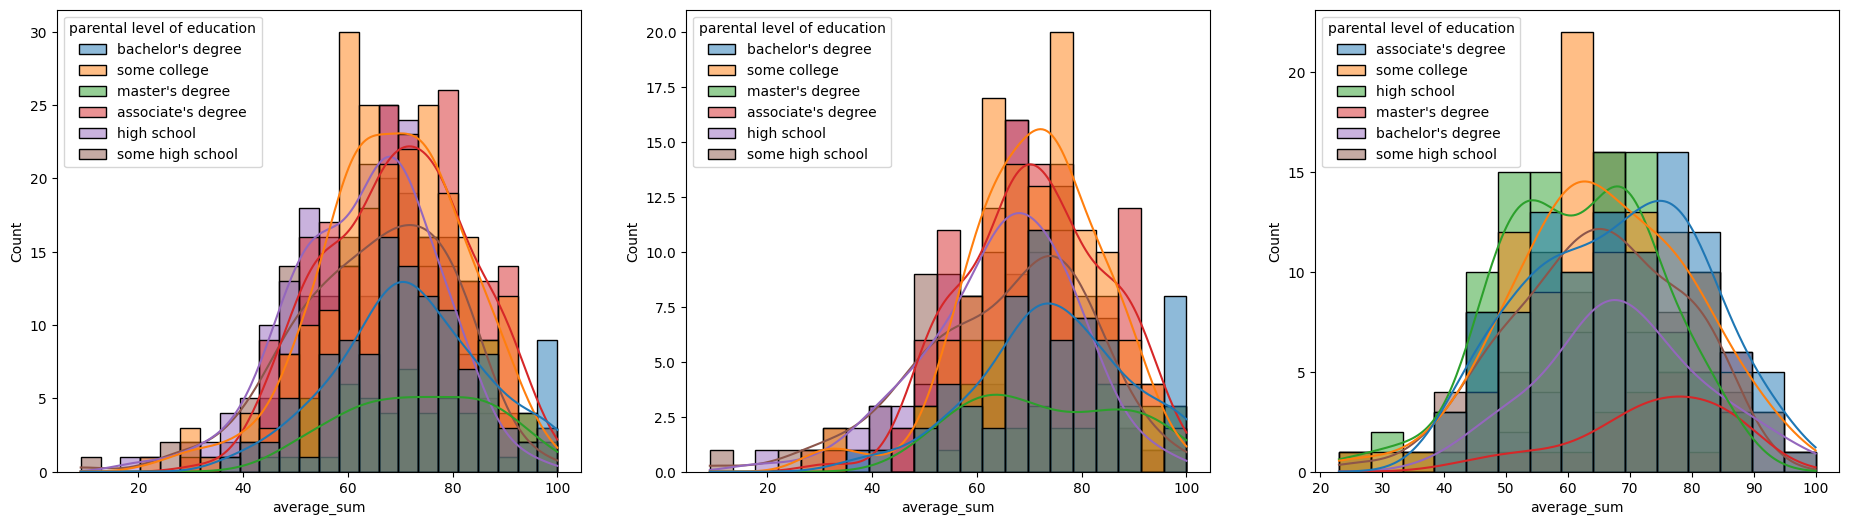

In [16]:
plt.subplots(1,3,figsize = (23,6))
plt.subplot(131)
sns.histplot(data = df, x ='average_sum',kde = 'True' , hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x ='average_sum',kde = 'True' , hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender=='male'], x ='average_sum',kde = 'True' , hue = 'parental level of education')

#### Insight : parent level of education does not help in student score/exam at all.

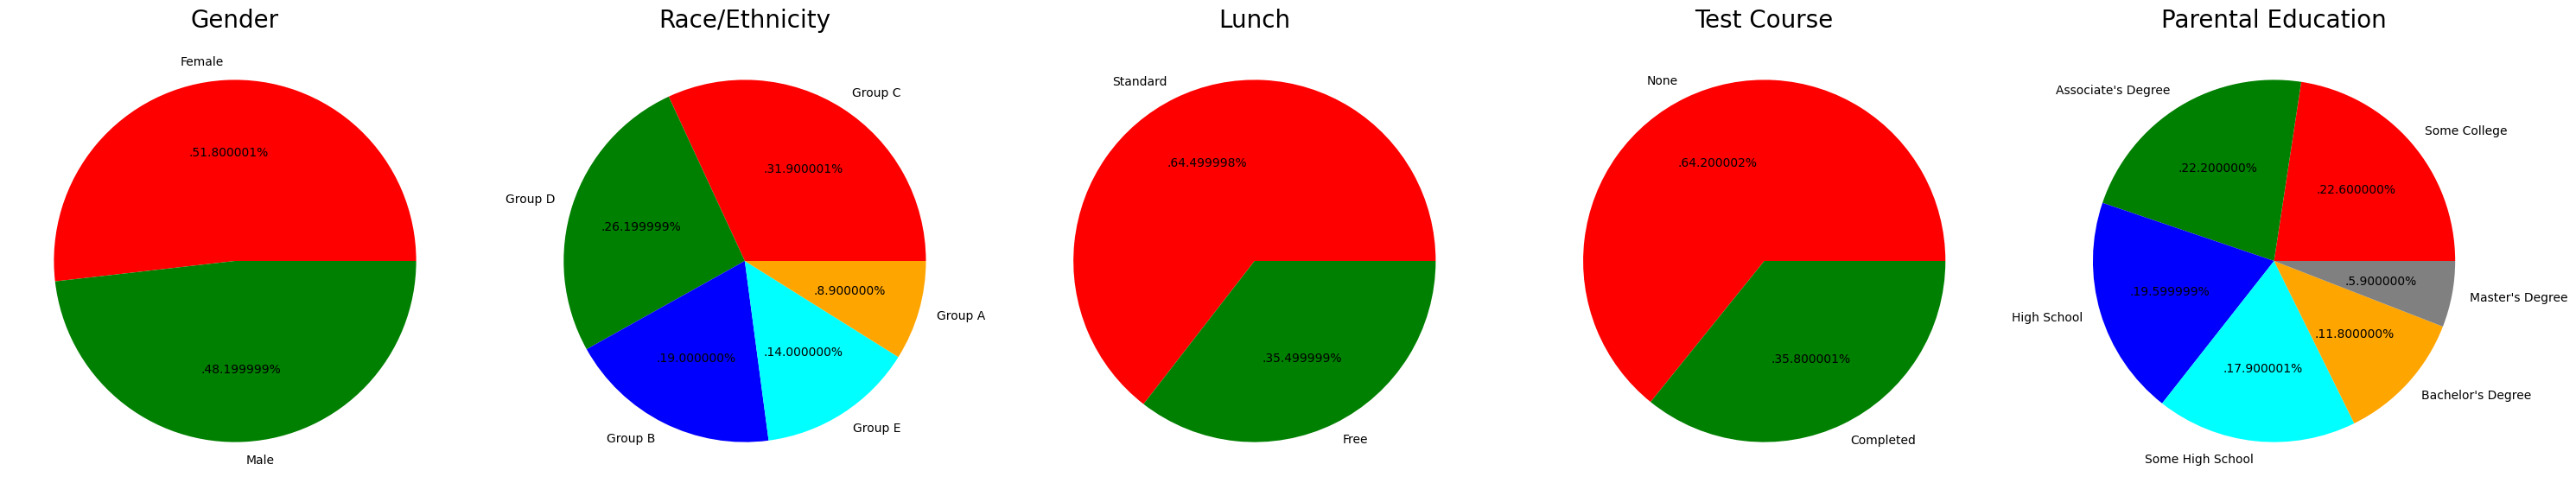

In [17]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

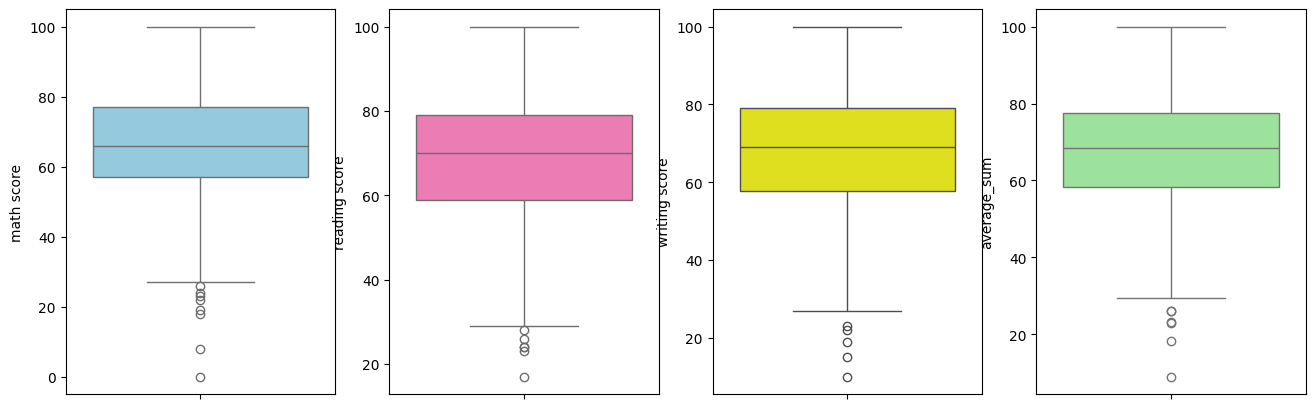

In [18]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_sum'],color='lightgreen')
plt.show()